In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

WIDTH = 101
HEIGHT = 103
SECONDS = 100

limit_x = (WIDTH - 1) // 2
limit_y = (HEIGHT - 1) // 2


def movement(x_pos, y_pos, x_vel, y_vel):
    for i in range(SECONDS):
        x_pos = x_pos + x_vel
        y_pos = y_pos + y_vel

        if x_pos < 0:
            x_pos = WIDTH + x_pos

        elif x_pos >= WIDTH:
            x_pos = x_pos - WIDTH


        if y_pos < 0:
            y_pos = HEIGHT + y_pos

        elif y_pos >= HEIGHT:
            y_pos = y_pos - HEIGHT

    return x_pos, y_pos

q1, q2, q3, q4 = 0, 0, 0, 0

with open('real_input.txt', 'r') as file:
    grid = []
    for line in file:
        line = line.strip()

        first_split = line.split(' ')
        second_split = []
        for i in first_split:
            second_split += i.split(',')

        line_fin = []
        for i in second_split:
            if '=' in i:
                line_fin.append(int(i[2:]))
            else:
                line_fin.append(int(i))
    

        grid.append(line_fin)
        

        x, y = movement(*line_fin)

        if x < limit_x and y < limit_y:
            q1 += 1

        elif x > limit_x and y < limit_y:
            q2 += 1

        elif x > limit_x and y > limit_y:
            q3 += 1

        elif x < limit_x and y > limit_y:
            q4 += 1

print('Result:', q1 *q2 * q3 * q4)



def movement_plot(x_pos, y_pos, x_vel, y_vel):
    x_pos = x_pos + x_vel
    y_pos = y_pos + y_vel

    if x_pos < 0:
        x_pos = WIDTH + x_pos

    elif x_pos >= WIDTH:
        x_pos = x_pos - WIDTH


    if y_pos < 0:
        y_pos = HEIGHT + y_pos

    elif y_pos >= HEIGHT:
        y_pos = y_pos - HEIGHT

    return [x_pos, y_pos, x_vel, y_vel]



def grid_to_plot(grid, second):
    mat = np.zeros((WIDTH, HEIGHT))
    for i in grid:
        mat[i[0], i[1]] = 1

    plt.title(f'Second: {second}')
    sns.heatmap(mat, cmap = 'Blues', cbar = False)
    plt.xticks([])
    plt.yticks([])
    plt.show()


second = 0
var_x = []
var_y = []
grid_prec, grid_ac = grid, []
while second < 10000:

    x_grid = [item[0] for item in grid_prec]
    y_grid = [item[1] for item in grid_prec]
    var_x.append(np.std(x_grid))
    var_y.append(np.std(y_grid))

    for i in range(len(grid)):
        grid_ac.append(movement_plot(*grid_prec[i]))
    

    grid_prec, grid_ac = grid_ac, []
    if second == 8148:
        grid_to_plot(grid_prec, second)
    second += 1
    

min_x, min_y = min(var_x), min(var_y)

for i in range(len(var_x)):
    if var_x[i] == min_x and var_y[i] == min_y:
        print(f'Result 2: {i}')
        break



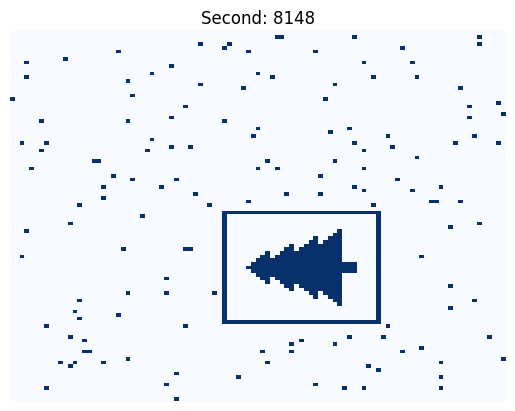

Result 2: 8149


8149


# Part two